# Preparation Functions

### Imports

In [1]:
from sklearn.datasets import fetch_kddcup99
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler

from imblearn.under_sampling import RandomUnderSampler
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Data Cleaning

In [2]:
def cleaning_data():
    # Get Data
    X, y= fetch_kddcup99(percent10=True, random_state=42, as_frame=True, return_X_y=True)
    
    # Remove "normal" from the dataset
    X = X[y != b'normal.']
    y = y[y != b'normal.']

    #Encodd the following fields
    le = LabelEncoder()
    X["protocol_type"] = le.fit_transform(X["protocol_type"])
    X["service"] = le.fit_transform(X["service"])
    X["flag"] = le.fit_transform(X["flag"])

    '''
    X["duration"] = le.fit_transform(X["duration"])
    X["src_bytes"] = le.fit_transform(X["src_bytes"])
    X["dst_bytes"] = le.fit_transform(X["dst_bytes"])
    X["land"] = le.fit_transform(X["land"])
    X["wrong_fragment"] = le.fit_transform(X["wrong_fragment"])
    X["urgent"] = le.fit_transform(X["urgent"])
    X["hot"] = le.fit_transform(X["hot"])
    X["num_failed_logins"] = le.fit_transform(X["num_failed_logins"])
    X["logged_in"] = le.fit_transform(X["logged_in"])
    X["num_compromised"] = le.fit_transform(X["num_compromised"])
    X["root_shell"] = le.fit_transform(X["root_shell"])
    X["su_attempted"] = le.fit_transform(X["su_attempted"])
    X["num_root"] = le.fit_transform(X["num_root"])
    X["num_file_creations"] = le.fit_transform(X["num_file_creations"])
    X["num_shells"] = le.fit_transform(X["num_shells"])
    X["num_access_files"] = le.fit_transform(X["num_access_files"])
    X["num_outbound_cmds"] = le.fit_transform(X["num_outbound_cmds"])
    X["is_host_login"] = le.fit_transform(X["is_host_login"])
    X["is_guest_login"] = le.fit_transform(X["is_guest_login"])
    X["count"] = le.fit_transform(X["count"])
    X["srv_count"] = le.fit_transform(X["srv_count"])
    X["serror_rate"] = le.fit_transform(X["serror_rate"])
    X["srv_serror_rate"] = le.fit_transform(X["srv_serror_rate"])
    X["rerror_rate"] = le.fit_transform(X["rerror_rate"])
    X["srv_rerror_rate"] = le.fit_transform(X["srv_rerror_rate"])
    X["same_srv_rate"] = le.fit_transform(X["same_srv_rate"])
    X["diff_srv_rate"] = le.fit_transform(X["diff_srv_rate"])
    X["srv_diff_host_rate"] = le.fit_transform(X["srv_diff_host_rate"])
    X["dst_host_count"] = le.fit_transform(X["dst_host_count"])
    X["dst_host_srv_count"] = le.fit_transform(X["dst_host_srv_count"])
    X["dst_host_same_srv_rate"] = le.fit_transform(X["dst_host_same_srv_rate"])
    X["dst_host_diff_srv_rate"] = le.fit_transform(X["dst_host_diff_srv_rate"])
    X["dst_host_same_src_port_rate"] = le.fit_transform(X["dst_host_same_src_port_rate"])
    X["dst_host_srv_diff_host_rate"] = le.fit_transform(X["dst_host_srv_diff_host_rate"])
    X["dst_host_serror_rate"] = le.fit_transform(X["dst_host_serror_rate"])
    X["dst_host_srv_serror_rate"] = le.fit_transform(X["dst_host_srv_serror_rate"])
    X["dst_host_rerror_rate"] = le.fit_transform(X["dst_host_rerror_rate"])
    X["dst_host_srv_rerror_rate"] = le.fit_transform(X["dst_host_srv_rerror_rate"])
    '''
    #y = np.where(((y == b'nmap.') | (y==b'ipsweep.') | (y==b'portsweep.') | (y==b'satan.')), 1, 0)
    y = np.where(((y== b'smurf.') | (y==b'teardrop.') | (y== b'back.') | (y== b'land.') | (y== b'neptune.') | (y== b'pod.')), 1, 0)

    return X,y

### Graph Functions

In [3]:

def accuracy_graph(accuracy_labels,accuracy_values, title=None):
    fig,ax = plt.subplots()
    #accuracy_labels = ['No Regularization', 'L1', 'L2']
    #accuracy_values = [0.99, 0.8, 0.5]
    bar_container = ax.bar(accuracy_labels, accuracy_values)
    ax.bar_label(bar_container, fmt='{:,.9f}')
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    ax.set_xlabel('Regression Type')
    plt.show()

def weight_graph(labels, values, xliml, xlimr, title=None):
    fig,ax = plt.subplots()
    bar_container = ax.barh(labels, values)
    ax.bar_label(bar_container, fmt='{:,.3f}')
    ax.set_xlabel('Weights')
    ax.set_title(title)
    ax.set_ylabel('Features')
    ax.set_xlim(left=xliml, right=xlimr)
    plt.show()

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    print('Plotting graph...')

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

### Prep Data for Graphing

In [4]:
def find_weights(weights, features, title, xliml=--5, xlimr=5):
    n_weight = [] #will store the absolute value of each value in weights
    
    for i in weights:
        #taking each coef_[0] value and getting the absolute
        #The abs val is then appended to n_weight
        n_weight.append(abs(i))

    #creating a DataFram to store values
    data = pd.DataFrame({'Original weights': weights, 'Absolute Weights': n_weight, 'features':features})
    
    data = data.sort_values(by=['Absolute Weights'], ascending=False)
    temp = data[:15]
    weight_graph(temp['features'], temp['Original weights'], xliml, xlimr, title)
    print(f'{temp}\n\n-----------------------------------------------------------\n')
    return temp['features']

### Feature Scaling

In [5]:
def feature_scaling(X_train, X_test):
    #Feature scaling for optimiztion: gradient descent implementation
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train_std = scaler.transform(X_train)

    scaler.fit(X_test)
    X_test_std = scaler.transform(X_test)
    '''
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    '''
    return X_train_std, X_test_std


### SVC Model

In [6]:
def SVC_Model(X_train, X_test, y_train, y_test, X_train_std, X_test_std, graph_type=0, kernel_type='linear', c =1.0 ):
#def SVC_Model(X_train, X_test, y_train, y_test, graph_type=0, kernel_type='linear'):
    #svm = SGDClassifier(loss='hinge')

    svm = SVC(
            random_state=1,
            max_iter= 1000,
            kernel=kernel_type,
            C=c
        )

    svm.fit(X_train_std, y_train)
    labels = []
    accuracy = []
    
    #training accuracy
    y_hat = svm.predict(X_train_std[:])
    accuracy.append(accuracy_score(y_train[:], y_hat))
    labels.append("Train")
    if kernel_type=='linear':
        coeff = svm.coef_[0]

    #test accuracy
    y_hat = svm.predict(X_test_std[:])
    accuracy.append(accuracy_score(y_test[:], y_hat))
    labels.append("Test")

    iterations = svm.n_iter_
    print(f'{kernel_type} iterations to Converge: {iterations}')
    print(f'Difference in Accuracy: {accuracy[0] - accuracy[1]}')
    #accuracy_graph(labels,accuracy)

    if graph_type == 0:
        if kernel_type=='linear':
            return labels, accuracy, coeff
    else:
        return accuracy[0], accuracy[1]

    #find_weights(coeff, X_train.columns, "Non-Regularized Top 15 Weights", xliml=-75, xlimr=75)
    
        

# Main Code With Results

## Undersampling X Y Data Results

In [7]:
def RUS_method_1():
    
    # Function to clean data
    X, y = cleaning_data()

    scaler = MinMaxScaler()
    scaler.fit(X)
    #X = scaler.transform(X)
    
    # Random Under Sampling
    sampling_string = 'majority'
    rus = RandomUnderSampler(sampling_strategy=sampling_string, random_state=42)
    X_resample, y_resample = rus.fit_resample(X, y)
    
    # Splitting data into 80% training and 20% test data:
    X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=42, stratify=y_resample)
    X_train_std = scaler.transform(X_train)
    X_test_std = scaler.transform(X_test)
    
    #X_train_std, X_test_std = feature_scaling(X_train, X_test)
    
    return X_train, X_test, y_train, y_test, X_train_std, X_test_std, X, y

### Training

**Default Values:**
- kernel_type=linear
- C = 1.0

**Iterations to converge:** 538
The training data performs slightly better than the test data.

linear iterations to Converge: [538]
Difference in Accuracy: 0.0010643330179754829


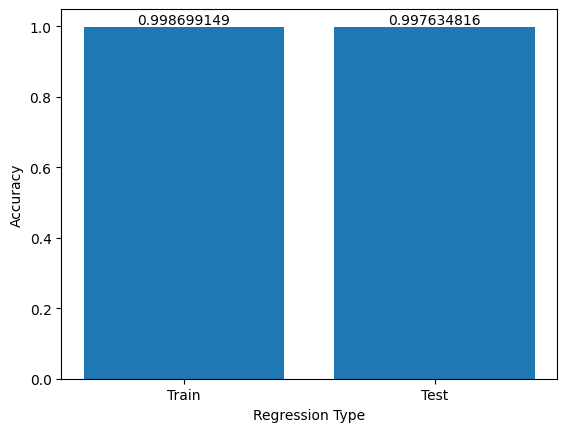

In [8]:
X_train, X_test, y_train, y_test, X_train_std, X_test_std, X, y = RUS_method_1()
labels,accuracy, coeff = SVC_Model(X_train, X_test, y_train, y_test, X_train_std, X_test_std, kernel_type='linear')
#labels,accuracy = SVC_Model(X_train, X_test, y_train, y_test, kernel_type='linear')

accuracy_graph(labels,accuracy)

### SVC: 4 Kernal Example
**RBF**
- Took the least iterations to converge: 223
- Heighest Accuracy: 0.9995

**Poly**
- Took the second least iterations to converge: 244
- Second Heighest Accuracy

**Linear**
- Took 538 iterations to converge (which was the heighest number of iterations)
- 3rd most accurate

**Sigmoid**
- Took 382 iterations to converge (which was less than linear) but...
- Was the least accurate at 0.98

rbf iterations to Converge: [223]
Difference in Accuracy: 0.0009460737937558861
linear iterations to Converge: [538]
Difference in Accuracy: 0.0010643330179754829
poly iterations to Converge: [244]
Difference in Accuracy: 0.0013008514664143433
sigmoid iterations to Converge: [382]
Difference in Accuracy: -0.00449385052034057


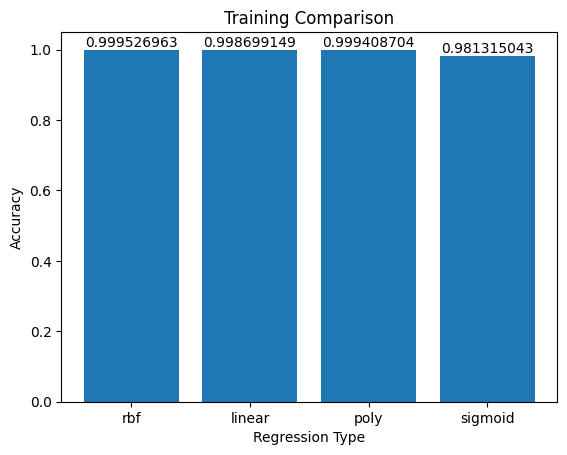

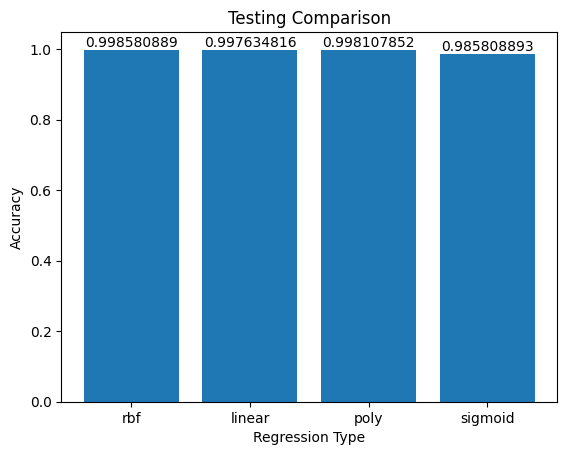

In [9]:
X_train, X_test, y_train, y_test, X_train_std, X_test_std, X, y = RUS_method_1()
labels = []
training = []
testing = []

temp = SVC_Model(X_train, X_test, y_train, y_test, X_train_std, X_test_std, 1, kernel_type='rbf')
labels.append('rbf')
training.append(temp[0])
testing.append (temp[1])

temp = SVC_Model(X_train, X_test, y_train, y_test, X_train_std, X_test_std, 1,  kernel_type='linear')
labels.append('linear')
training.append(temp[0])
testing.append (temp[1])

temp = SVC_Model(X_train, X_test, y_train, y_test, X_train_std, X_test_std, 1, kernel_type='poly')
labels.append('poly')
training.append(temp[0])
testing.append (temp[1])

temp = SVC_Model(X_train, X_test, y_train, y_test, X_train_std, X_test_std, 1, kernel_type='sigmoid')
labels.append('sigmoid')
training.append(temp[0])
testing.append (temp[1])
#Models.append(SVC_Model(X_train, X_test, y_train, y_test, X_train_std, X_test_std, kernel_type='precomputed'))

accuracy_graph(labels,training, "Training Comparison")
accuracy_graph(labels,testing, "Testing Comparison")

# TO DO!!!! Print out all the weights for each graphy type. (just the list)
# Need coeff!

#accuracy.append(accuracy1[1]-accuracy1[0])
#accuracy.append(accuracy2[1]-accuracy2[0])

#labels = ["L1", "L2"]
#accuracy_graph(labels,accuracy, "L1/L2 Comparison")

#find_weights(coeff1, X_train.columns,"L1 Top 15 Weights", -10, 10)
#find_weights(coeff2, X_train.columns,"L2 Top 15 Weights", -10, 10)


### Pick Two Features

**Process**
For this part of the assignment, I took the following stesp:
1. Trained using SVM Linear and all of the features
2. Gathered the top 15 features with the heighest absolute weight
3. Used these weights (2 at a time) for further training

**SVM**
My initial hypothesis was that the features with the hieghst weights would make the most impact, so I created a nested loop to draw decision boundaries for different combinations of the top 5 weighted features. For comparision purposes, I titled each graph "SVM {Accuracy}" (See below)

**Observation**
For context, I ran the code below 4+ times, and each time it yeilded slightly different results.

The weight combination that yeilded the heighest accuracy typically had a combination of the following:
- root_shell (w=-1.591484)
- diff_srv_rate (w=-2.201263)
- dst_host_serror_rate (w=0.806910)
- dst_host_same_src_port_rate (w=-2.025932)

This was surprising because I was expecting "wrong_fragment" (w=3.494652) to be the determining weight.
Another observation is that the accuracy of the model is no heigher than ~0.67 (rounded up) compared to the 0.99+ accuracy we recieved when using all of the features. 


linear iterations to Converge: [538]
Difference in Accuracy: 0.0010643330179754829


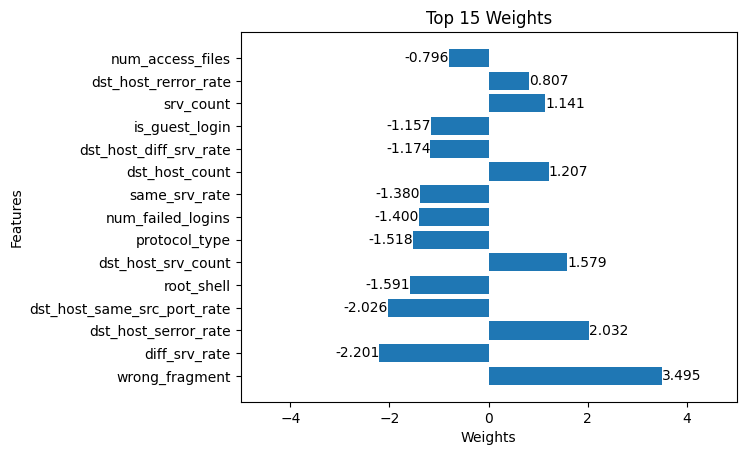

    Original weights  Absolute Weights                     features
7           3.494652          3.494652               wrong_fragment
29         -2.201263          2.201263                diff_srv_rate
37          2.031629          2.031629         dst_host_serror_rate
35         -2.025932          2.025932  dst_host_same_src_port_rate
13         -1.591484          1.591484                   root_shell
32          1.578806          1.578806           dst_host_srv_count
1          -1.518368          1.518368                protocol_type
10         -1.400000          1.400000            num_failed_logins
28         -1.380107          1.380107                same_srv_rate
31          1.206994          1.206994               dst_host_count
34         -1.174334          1.174334       dst_host_diff_srv_rate
21         -1.156575          1.156575               is_guest_login
23          1.141284          1.141284                    srv_count
39          0.806910          0.806910         d

C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Plotting graph...


C:\Users\payge\AppData\Local\Temp\ipykernel_11904\617458397.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


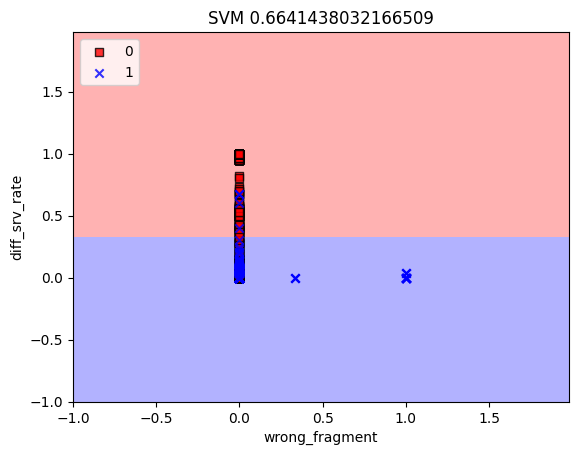

----------------------------------------------NEXT----------------------------


C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Plotting graph...


C:\Users\payge\AppData\Local\Temp\ipykernel_11904\617458397.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


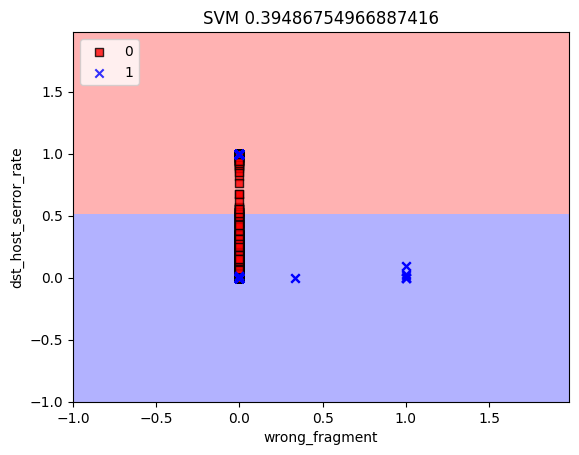

----------------------------------------------NEXT----------------------------


C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Plotting graph...


C:\Users\payge\AppData\Local\Temp\ipykernel_11904\617458397.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


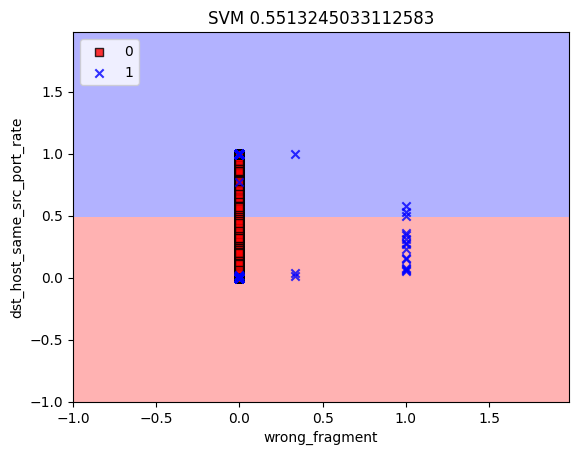

----------------------------------------------NEXT----------------------------


C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Plotting graph...


C:\Users\payge\AppData\Local\Temp\ipykernel_11904\617458397.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


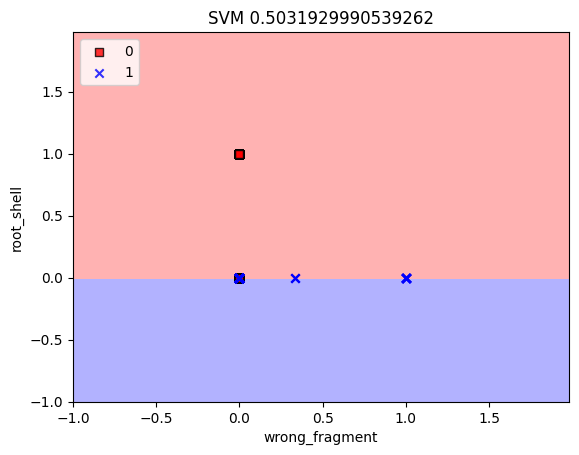

----------------------------------------------NEXT----------------------------


C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Plotting graph...


C:\Users\payge\AppData\Local\Temp\ipykernel_11904\617458397.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


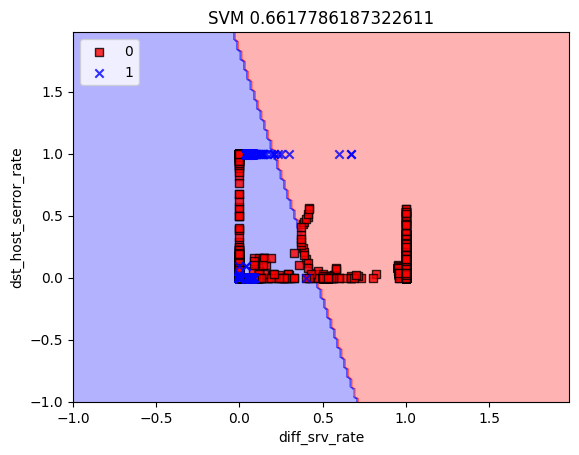

----------------------------------------------NEXT----------------------------


C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Plotting graph...


C:\Users\payge\AppData\Local\Temp\ipykernel_11904\617458397.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


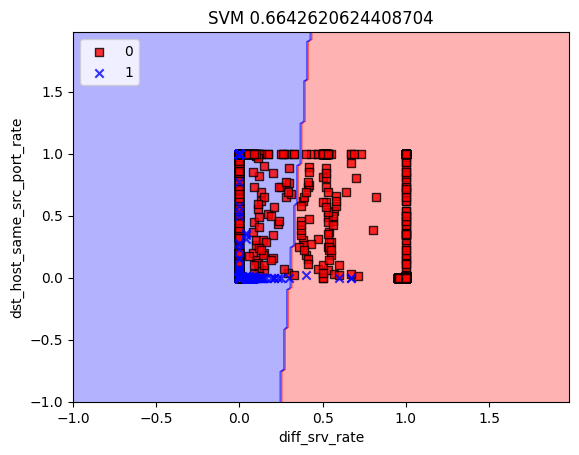

----------------------------------------------NEXT----------------------------


C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Plotting graph...


C:\Users\payge\AppData\Local\Temp\ipykernel_11904\617458397.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


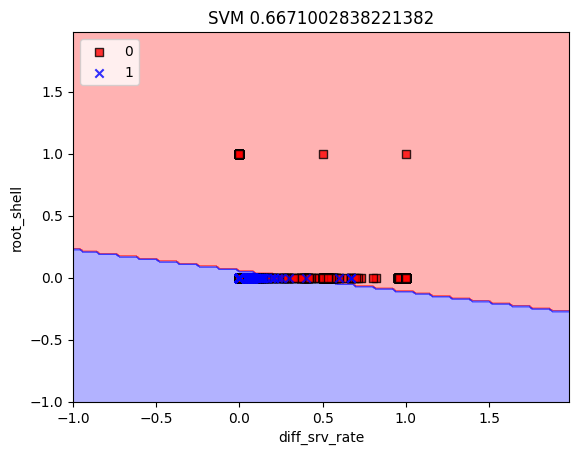

----------------------------------------------NEXT----------------------------


C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Plotting graph...


C:\Users\payge\AppData\Local\Temp\ipykernel_11904\617458397.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


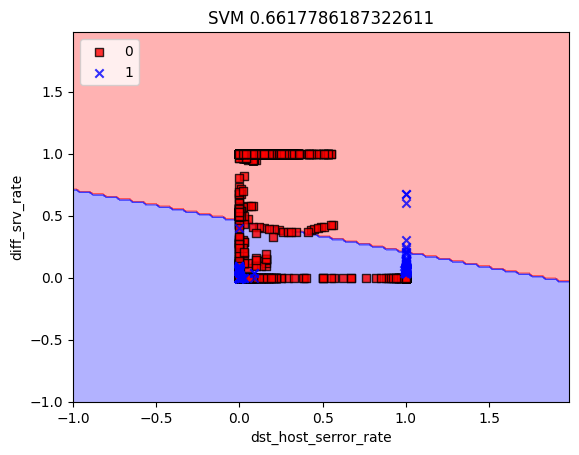

----------------------------------------------NEXT----------------------------


C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Plotting graph...


C:\Users\payge\AppData\Local\Temp\ipykernel_11904\617458397.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


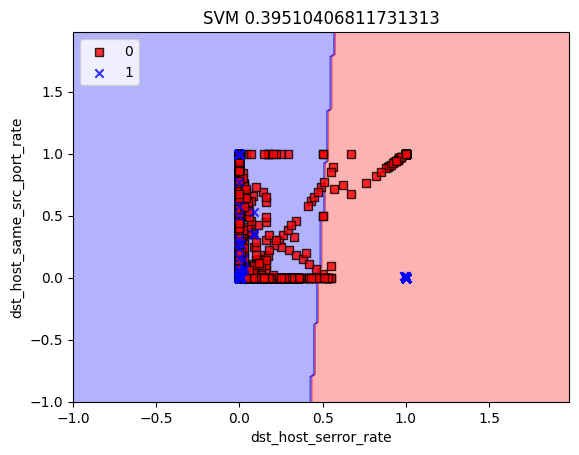

----------------------------------------------NEXT----------------------------


C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Plotting graph...


C:\Users\payge\AppData\Local\Temp\ipykernel_11904\617458397.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


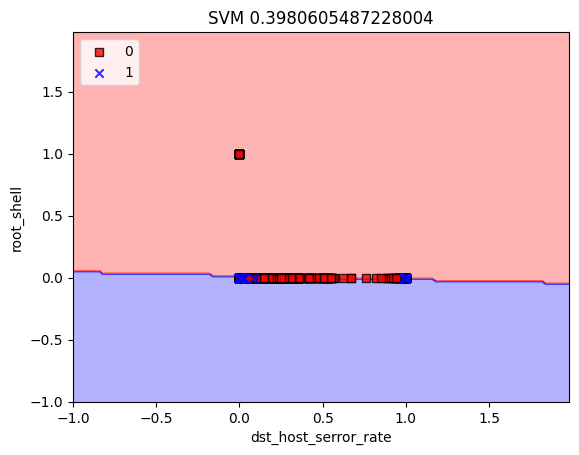

----------------------------------------------NEXT----------------------------


C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Plotting graph...


C:\Users\payge\AppData\Local\Temp\ipykernel_11904\617458397.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


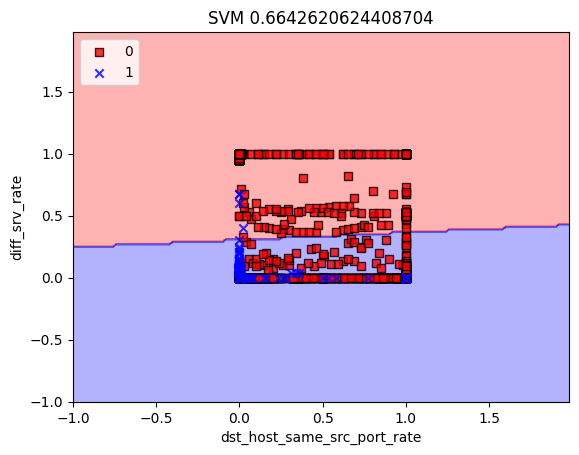

----------------------------------------------NEXT----------------------------


C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Plotting graph...


C:\Users\payge\AppData\Local\Temp\ipykernel_11904\617458397.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


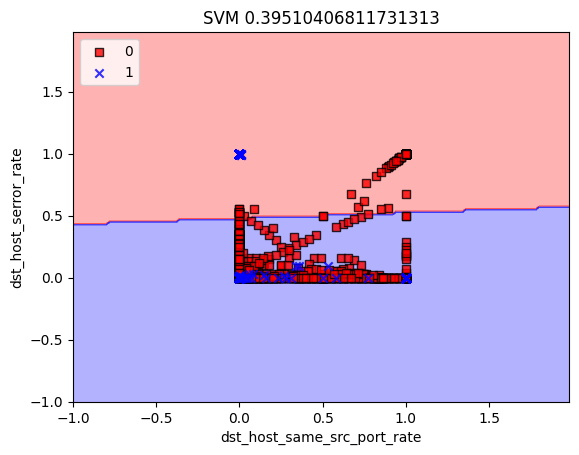

----------------------------------------------NEXT----------------------------


C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Plotting graph...


C:\Users\payge\AppData\Local\Temp\ipykernel_11904\617458397.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


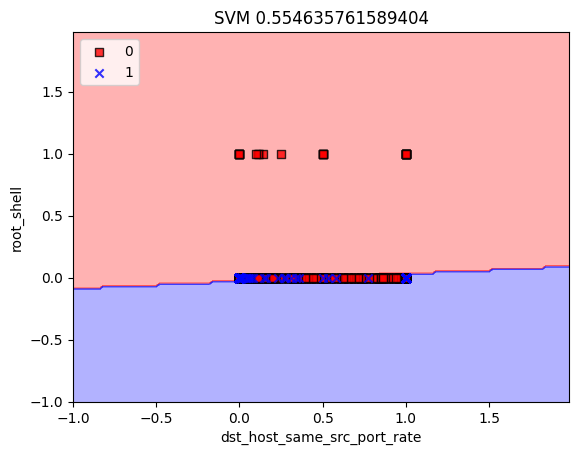

----------------------------------------------NEXT----------------------------


C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Plotting graph...


C:\Users\payge\AppData\Local\Temp\ipykernel_11904\617458397.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


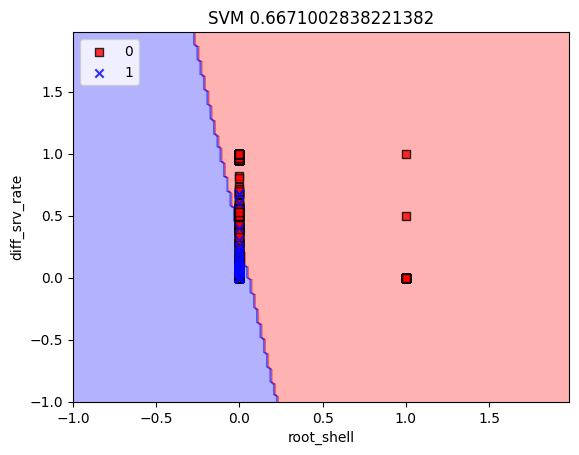

----------------------------------------------NEXT----------------------------


C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Plotting graph...


C:\Users\payge\AppData\Local\Temp\ipykernel_11904\617458397.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


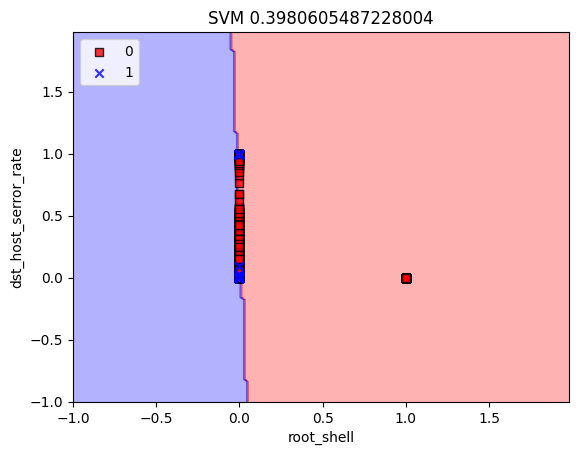

----------------------------------------------NEXT----------------------------


C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Plotting graph...


C:\Users\payge\AppData\Local\Temp\ipykernel_11904\617458397.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


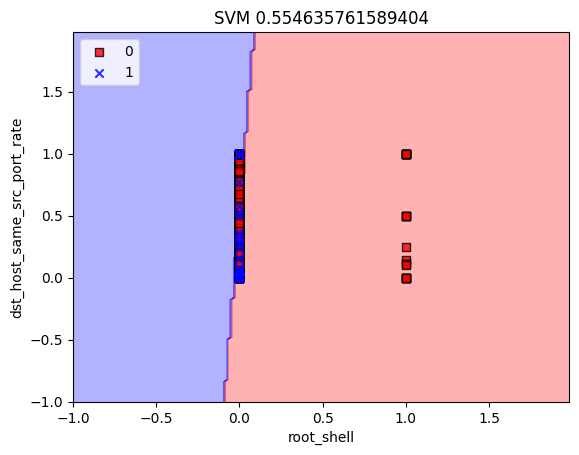

----------------------------------------------NEXT----------------------------


In [12]:
X_train, X_test, y_train, y_test, X_train_std, X_test_std, X, y = RUS_method_1()
labels,accuracy, coeff = SVC_Model(X_train, X_test, y_train, y_test, X_train_std, X_test_std, kernel_type='linear')

res = find_weights(coeff, X_train.columns, "Top 15 Weights", xliml=-5, xlimr=5)
temp = []
for i in res:
    # Get Column index number/location by name
    temp.append([X_train.columns.get_loc(i), i])

print(temp)

for i in range(len(temp)-10):
    x = temp[i][0]
    for j in range(1,len(temp)-10):
        if i!=j:
            xx = temp[j][0]
            # Function to clean data
            X, y = cleaning_data()
            X = X.iloc[0:, [x,xx]].values
            
            scaler = MinMaxScaler()
            scaler.fit(X)
            #X = scaler.transform(X)
            
            # Random Under Sampling
            sampling_string = 'majority'
            rus = RandomUnderSampler(sampling_strategy=sampling_string, random_state=42)
            X_resample, y_resample = rus.fit_resample(X, y)
            
            # Splitting data into 80% training and 20% test data:
            X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=42, stratify=y_resample)
            X_train_std = scaler.transform(X_train)
            X_test_std = scaler.transform(X_test)
            svm = SVC(
                random_state=1,
                max_iter= 1000,
                kernel='linear',
                C=1.0
            )
            svm.fit(X_train_std, y_train)
            y_hat = svm.predict(X_train_std[:])
            accuracy = (accuracy_score(y_train[:], y_hat))
            
            plot_decision_regions(X_train_std, y_train, svm)
            plt.xlabel(temp[i][1])
            plt.ylabel(temp[j][1])
            plt.title(f"SVM {accuracy}")
            plt.legend(loc='upper left')
            plt.show()
            print('----------------------------------------------NEXT----------------------------')
    

### Pick Two Features

**Process**
For this part of the assignment, I took the following stesp:
1. Trained using SVM Linear and all of the features
2. Gathered the top 15 features with the heighest absolute weight
3. Used these weights (2 at a time) for further training

**SVM**
My initial hypothesis was that the features with the hieghst weights would make the most impact, so I created a nested loop to draw decision boundaries for different combinations of the top 5 weighted features. For comparision purposes, I titled each graph "RFB {Accuracy}" (See below)

**Observation**
I found that the weight combination that yeilded the heighest accuracy included a combination of: 

- root_shell
- diff_srv_rate
- dst_host_serror_rate
- dst_host_same_src_port_rate
- Wrong Fragment (which wasn't the case in the linear examples)

However, the iterations of decision boundaries was visually different than SVM Linear. 
- The decision boundary is drawn in a circle (unlike the linear line separating in linear kernel type)
- As the graphs progress, the size of the red and blue zones change, but the boundary remains a circle of various sizes. **Note:** There was one graph that had very strange results. It's labled RBF.png
- Another observation is that the accuracy of the model is no heigher than ~0.67+ (rounded) compared to the 0.99+ accuracy we recieved when using all of the features.
- It was also not surprising that since rbf performed better than linear when all of the features were used, that rbf would out perform linear when using two features.


linear iterations to Converge: [538]
Difference in Accuracy: 0.0010643330179754829


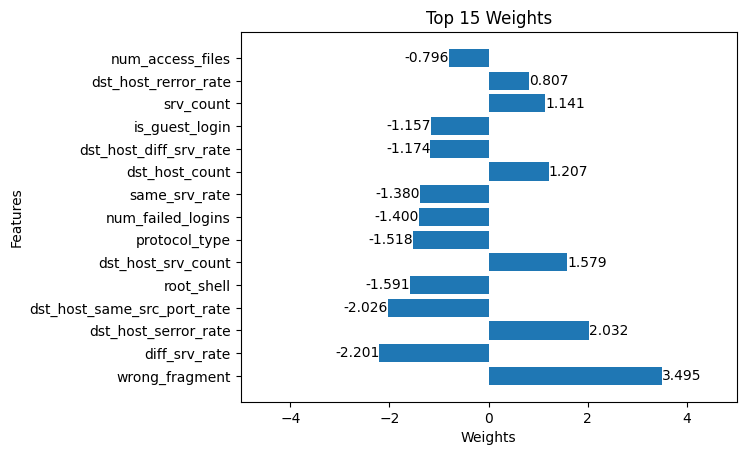

    Original weights  Absolute Weights                     features
7           3.494652          3.494652               wrong_fragment
29         -2.201263          2.201263                diff_srv_rate
37          2.031629          2.031629         dst_host_serror_rate
35         -2.025932          2.025932  dst_host_same_src_port_rate
13         -1.591484          1.591484                   root_shell
32          1.578806          1.578806           dst_host_srv_count
1          -1.518368          1.518368                protocol_type
10         -1.400000          1.400000            num_failed_logins
28         -1.380107          1.380107                same_srv_rate
31          1.206994          1.206994               dst_host_count
34         -1.174334          1.174334       dst_host_diff_srv_rate
21         -1.156575          1.156575               is_guest_login
23          1.141284          1.141284                    srv_count
39          0.806910          0.806910         d

C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Plotting graph...


C:\Users\payge\AppData\Local\Temp\ipykernel_11904\617458397.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


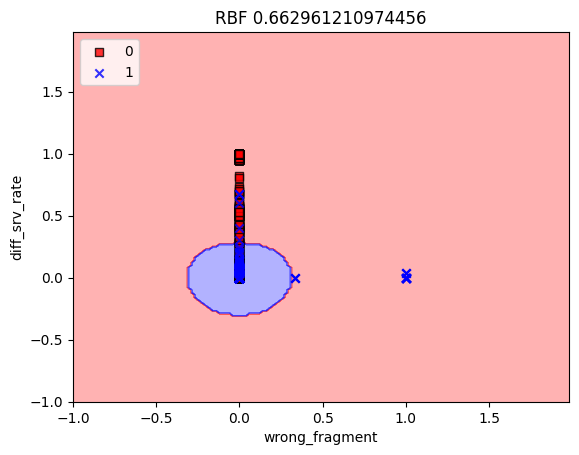

----------------------------------------------NEXT----------------------------


C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Plotting graph...


C:\Users\payge\AppData\Local\Temp\ipykernel_11904\617458397.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


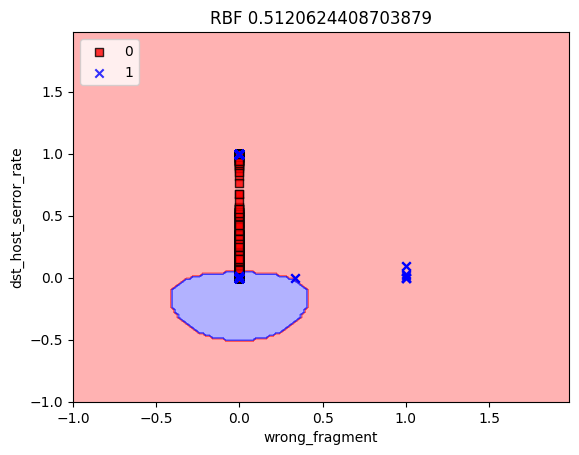

----------------------------------------------NEXT----------------------------


C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Plotting graph...


C:\Users\payge\AppData\Local\Temp\ipykernel_11904\617458397.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


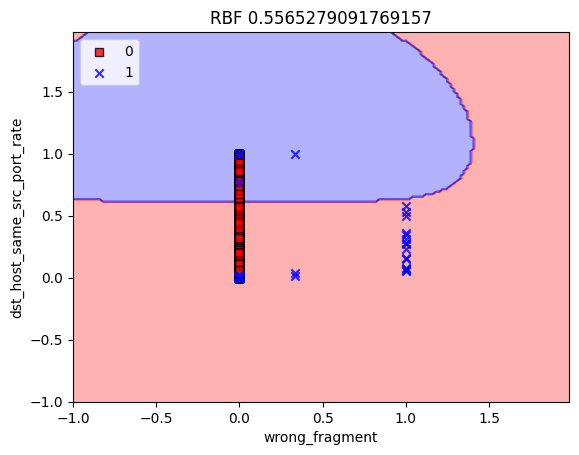

----------------------------------------------NEXT----------------------------


C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Plotting graph...


C:\Users\payge\AppData\Local\Temp\ipykernel_11904\617458397.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


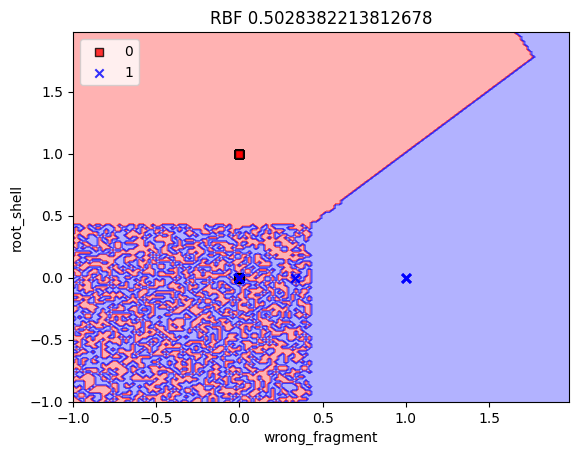

----------------------------------------------NEXT----------------------------


C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Plotting graph...


C:\Users\payge\AppData\Local\Temp\ipykernel_11904\617458397.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


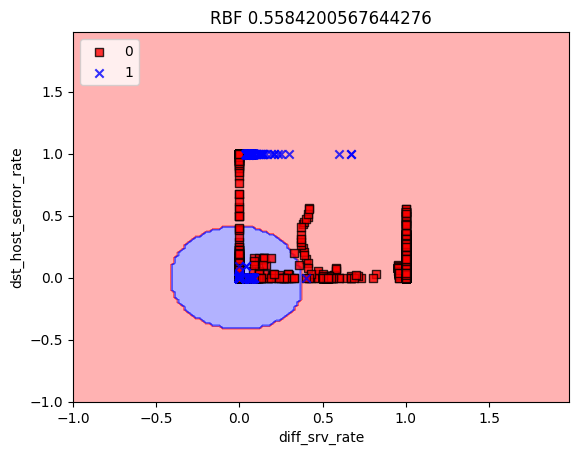

----------------------------------------------NEXT----------------------------


C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Plotting graph...


C:\Users\payge\AppData\Local\Temp\ipykernel_11904\617458397.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


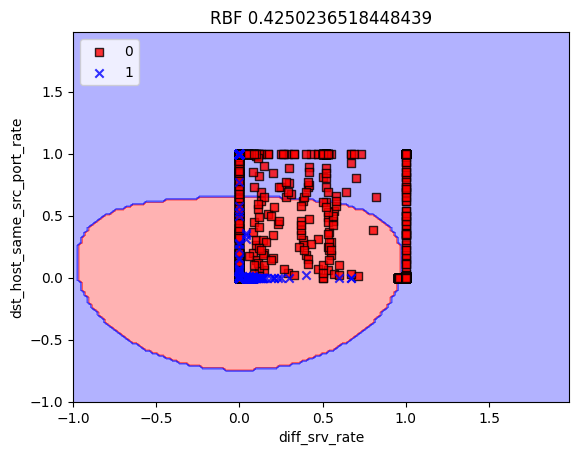

----------------------------------------------NEXT----------------------------


C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Plotting graph...


C:\Users\payge\AppData\Local\Temp\ipykernel_11904\617458397.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


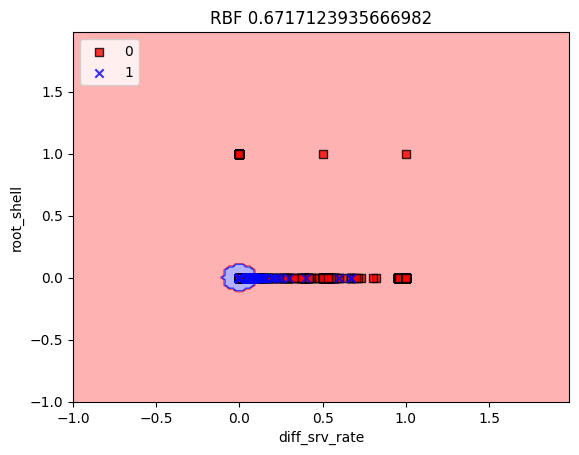

----------------------------------------------NEXT----------------------------


C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Plotting graph...


C:\Users\payge\AppData\Local\Temp\ipykernel_11904\617458397.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


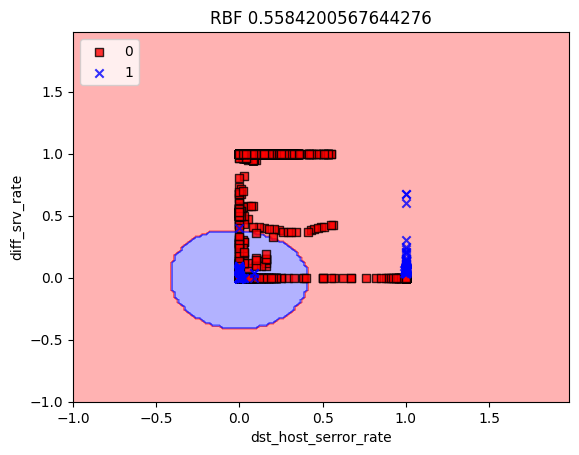

----------------------------------------------NEXT----------------------------


C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Plotting graph...


C:\Users\payge\AppData\Local\Temp\ipykernel_11904\617458397.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


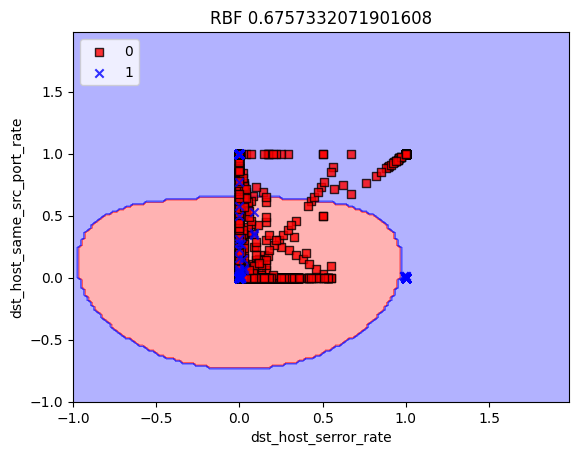

----------------------------------------------NEXT----------------------------


C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Plotting graph...


C:\Users\payge\AppData\Local\Temp\ipykernel_11904\617458397.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


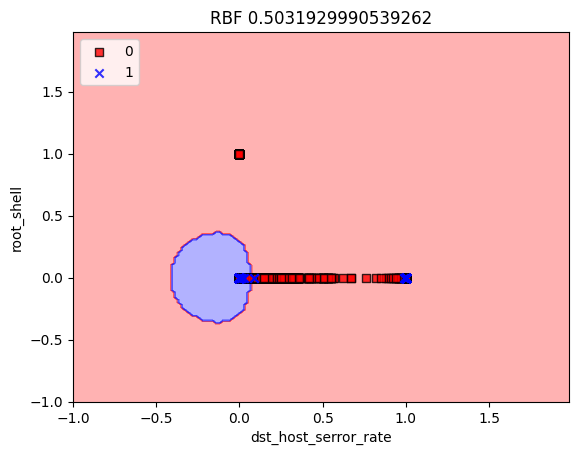

----------------------------------------------NEXT----------------------------


C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Plotting graph...


C:\Users\payge\AppData\Local\Temp\ipykernel_11904\617458397.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


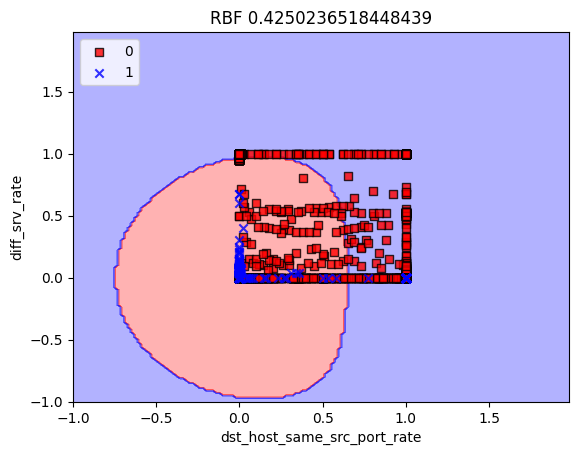

----------------------------------------------NEXT----------------------------


C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Plotting graph...


C:\Users\payge\AppData\Local\Temp\ipykernel_11904\617458397.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


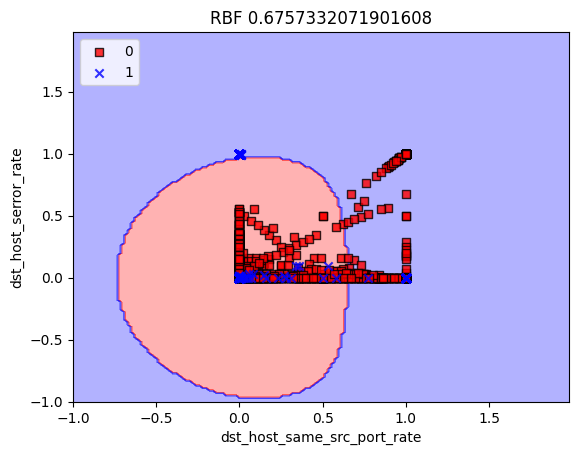

----------------------------------------------NEXT----------------------------


C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Plotting graph...


C:\Users\payge\AppData\Local\Temp\ipykernel_11904\617458397.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


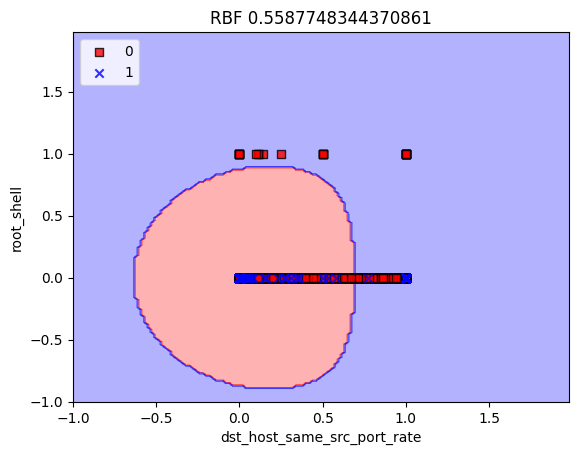

----------------------------------------------NEXT----------------------------


C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Plotting graph...


C:\Users\payge\AppData\Local\Temp\ipykernel_11904\617458397.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


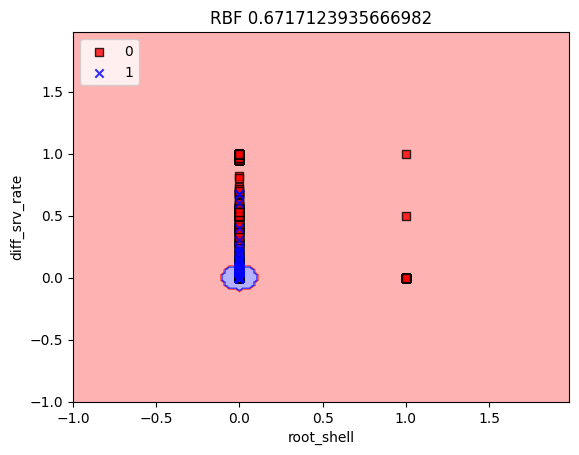

----------------------------------------------NEXT----------------------------


C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Plotting graph...


C:\Users\payge\AppData\Local\Temp\ipykernel_11904\617458397.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


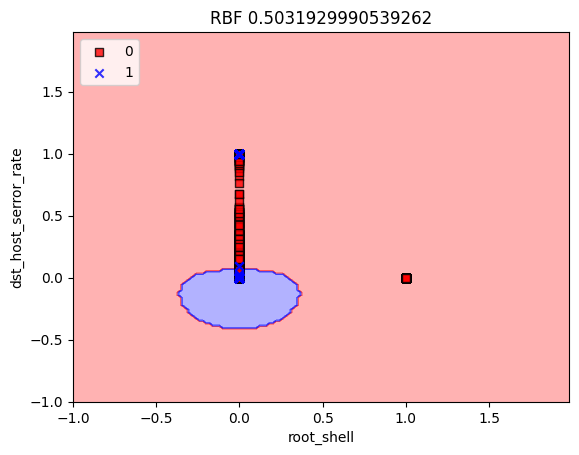

----------------------------------------------NEXT----------------------------


C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Plotting graph...


C:\Users\payge\AppData\Local\Temp\ipykernel_11904\617458397.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


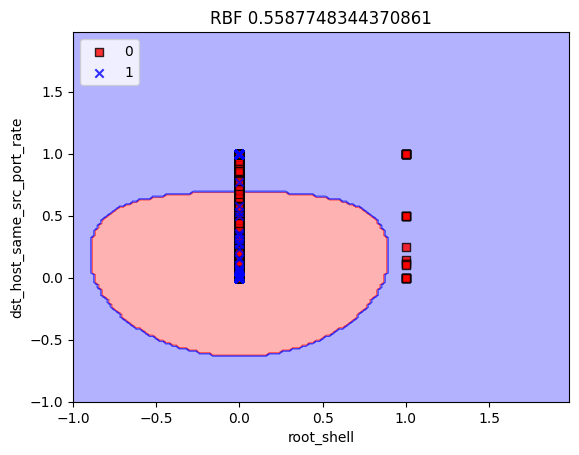

----------------------------------------------NEXT----------------------------


In [13]:
X_train, X_test, y_train, y_test, X_train_std, X_test_std, X, y = RUS_method_1()
labels,accuracy, coeff = SVC_Model(X_train, X_test, y_train, y_test, X_train_std, X_test_std, kernel_type='linear')

res = find_weights(coeff, X_train.columns, "Top 15 Weights", xliml=-5, xlimr=5)
temp = []
for i in res:
    # Get Column index number/location by name
    temp.append([X_train.columns.get_loc(i), i])

print(temp)

for i in range(len(temp)-10):
    x = temp[i][0]
    for j in range(1,len(temp)-10):
        if i!=j:
            xx = temp[j][0]
            # Function to clean data
            X, y = cleaning_data()
            X = X.iloc[0:, [x,xx]].values
            
            scaler = MinMaxScaler()
            scaler.fit(X)
            #X = scaler.transform(X)
            
            # Random Under Sampling
            sampling_string = 'majority'
            rus = RandomUnderSampler(sampling_strategy=sampling_string, random_state=42)
            X_resample, y_resample = rus.fit_resample(X, y)
            
            # Splitting data into 80% training and 20% test data:
            X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=42, stratify=y_resample)
            X_train_std = scaler.transform(X_train)
            X_test_std = scaler.transform(X_test)
            svm = SVC(
                random_state=1,
                max_iter= 1000,
                kernel='rbf',
                C=1.0
            )
            svm.fit(X_train_std, y_train)
            y_hat = svm.predict(X_train_std[:])
            accuracy = (accuracy_score(y_train[:], y_hat))
            
            plot_decision_regions(X_train_std, y_train, svm)
            plt.xlabel(temp[i][1])
            plt.ylabel(temp[j][1])
            plt.title(f"RBF {accuracy}")
            plt.legend(loc='upper left')
            plt.show()
            print('----------------------------------------------NEXT----------------------------')
    